# Import

In [1]:
! pip install scikit-plot

In [2]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import scikitplot as skplt

# scipy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

# scikit
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

# Load dataset

In [3]:
 credit_card = pd.read_csv("/content/CC GENERAL.csv")

# Exploratory Data Analysis, Data Cleaning, and Preprocessing

In [4]:
credit_card.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
#for values with 0 payments, set minimum payments as 0. 
val = credit_card.loc[((credit_card['MINIMUM_PAYMENTS'].isnull())&(credit_card['PAYMENTS']==0))].index
for i in val:
  credit_card.iloc[i,15] = 0

In [6]:
# set the remaining missing values based on the median proportion of minimum payments to payments
mean_prop = credit_card['MINIMUM_PAYMENTS']/credit_card['PAYMENTS']
mean_prop = mean_prop.median()
credit_card.fillna(value={'MINIMUM_PAYMENTS':mean_prop*credit_card['PAYMENTS']},inplace=True)

In [7]:
credit_card.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [8]:
credit_card.drop(['CUST_ID'], axis=1, inplace=True)

In [9]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

# Feature Enginnering

## StandardScaler

In [10]:
sc = StandardScaler()
sc.fit(credit_card)
Xs = sc.transform(credit_card)

## PCA

In [11]:
pca = PCA()
pca.fit(Xs)
pcs = pca.transform(Xs)

In [12]:
pcs.shape

(8949, 17)

## DBSCAN

In [61]:
db = DBSCAN(eps=1.5, min_samples=10)
dbc = db.fit_predict(Xs)
dbc

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
ccc = credit_card.copy()

In [63]:
ccc['cluster'] = dbc

In [64]:
ccc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [65]:
ccc['cluster'].value_counts()

 0    7388
-1    1561
Name: cluster, dtype: int64

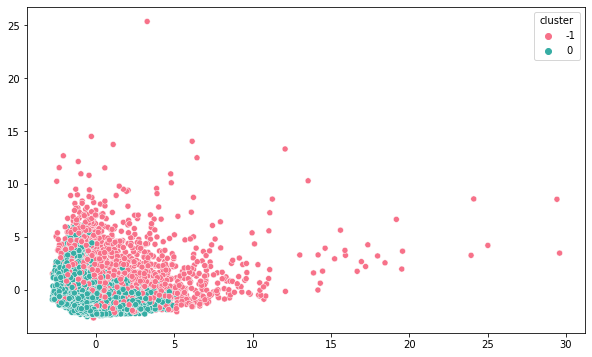

In [66]:
pal = sns.color_palette("husl", len(np.unique(dbc)))
plt.figure(figsize=(10,6))
sns.scatterplot(data=ccc, x=pcs[:, 0], y=pcs[:, 1], hue="cluster", palette=pal)

Text(0, 0.5, 'PURCHASES')

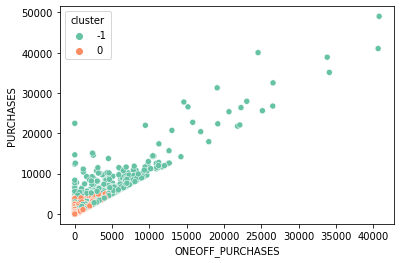

In [76]:
sns.scatterplot(data=ccc, x='ONEOFF_PURCHASES', y='PURCHASES', hue="cluster", palette="Set2")
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('PURCHASES')